# Practice Session 08: Communities

In this session we will use [NetworkX](https://networkx.github.io/) to compute communities on a graph. We will use the [Star Wars graph](https://github.com/evelinag/StarWars-social-network/tree/master/networks).

The dataset is contained in this input file that you will find in our [data](https://github.com/chatox/networks-science-course/tree/master/practicum/data) directory:
* ``starwars.graphml``: co-occurence of characters in scenes in the Star Wars saga in [GraphML](http://graphml.graphdrawing.org/) format.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. The Star Wars graph

The following code just loads the *Star Wars* graph into variable *g*. Leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
# LEAVE AS-IS

import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics

In [2]:
# LEAVE AS-IS

INPUT_GRAPH_FILENAME = "starwars.graphml"

# Read the graph in GraphML format
sw_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
sw_relabeled = nx.relabel.relabel_nodes(sw_in, dict(sw_in.nodes(data='name')))

# Convert the graph to undirected
sw = sw_relabeled.to_undirected()

In [3]:
# LEAVE AS-IS (OR MODIFY VISUALLY)

def plot_graph(g, width=20, height=20, font_size=12, partition=None):

    # Create a plot of width x height
    plt.figure(figsize=(width, height))

    # Colors
    if partition is None:
        partition = [ set(g.nodes()) ]
        
    num_parts = len(partition)
    
    node_to_color = {}
    part_color = 0.0
    for part in partition:
        for node in part:
            node_to_color[node] = part_color
        part_color += 1.0/num_parts
       
    colors = []
    for node in g.nodes():
        colors.append(node_to_color[node])
    
    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1000, font_size=font_size,
                   cmap=plt.get_cmap('YlOrRd'), node_color=colors)

    # Display
    plt.show()

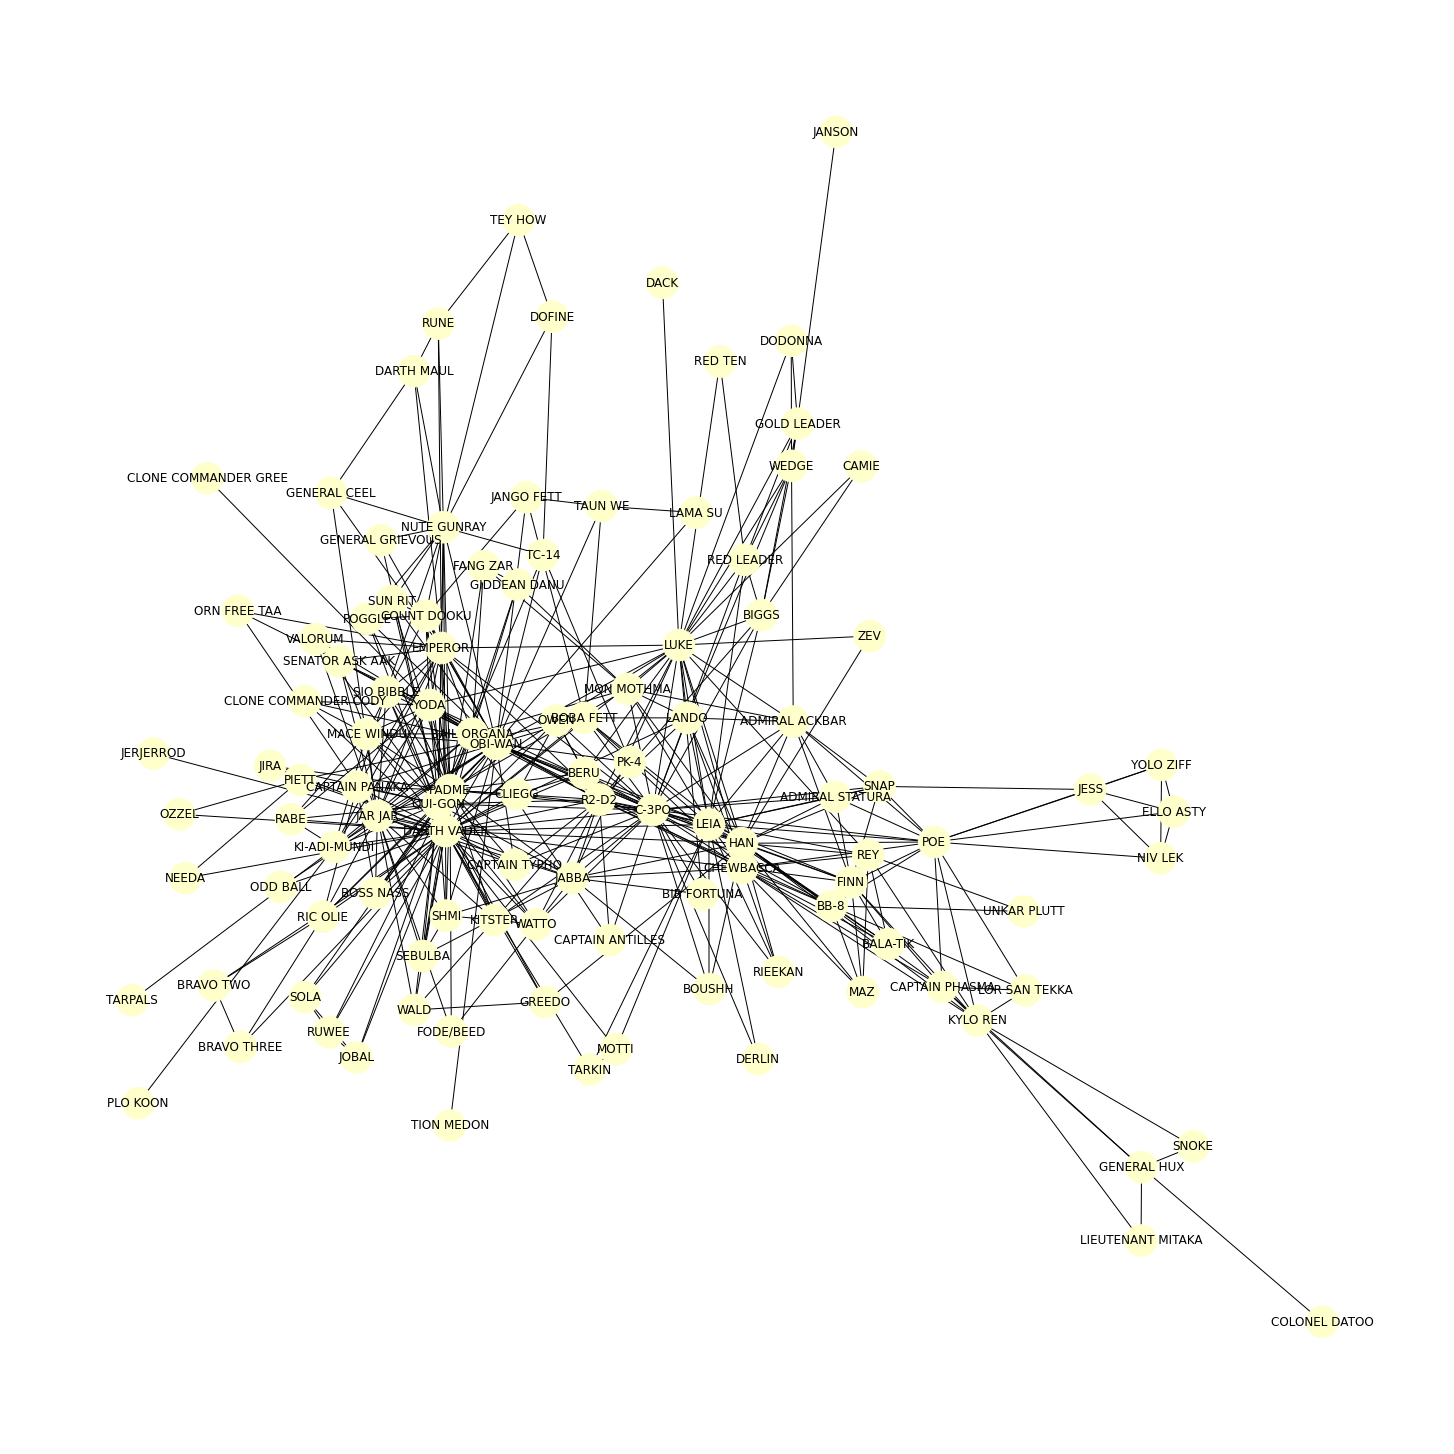

In [4]:
# LEAVE AS-IS

plot_graph(sw)

# 2. K-core decomposition

Now we will perform a k-core decomposition, using the following auxiliary functions, which you can leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [5]:
# LEAVE AS-IS

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

Complete the code for function `kcore_decomposition(g)`; to use this function, you do `node_to_kcore = kcore_decomposition(g)`.

```python
def kcore_decomposition(graph):
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(1, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            # Check if this list is empty
            if len(nodes_in_level) == 0:
                # TO-DO: implement (one line)

            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level:
                # TO-DO: implement this (two lines)

    return(node_to_level)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for "kcore_decomposition". Please remember to include enough comments to explain what your code is doing.</font>

Test your code. The following should print:

```python
K-core of JANSON: 1
K-core of RED TEN: 2
K-core of LUKE: 7
K-core of YODA: 8
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [7]:
# LEAVE AS-IS

node_to_kcore = kcore_decomposition(sw)

for character in ["JANSON", "RED TEN", "LUKE", "YODA"]:
    print("K-core of {:s}: {:d}".format(character, node_to_kcore[character]))

K-core of JANSON: 1
K-core of RED TEN: 2
K-core of LUKE: 7
K-core of YODA: 8


Now, create and draw a sub-graph named `swcore`, containing only the nodes with k-core number greater or equal to **4**. You can use [Graph.subgraph](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html)

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with a brief commentary on this graph.</font>

# 3. Modularity of a partition

We will compute the modularity of a partitioning. First, let's draw a small toy graph.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

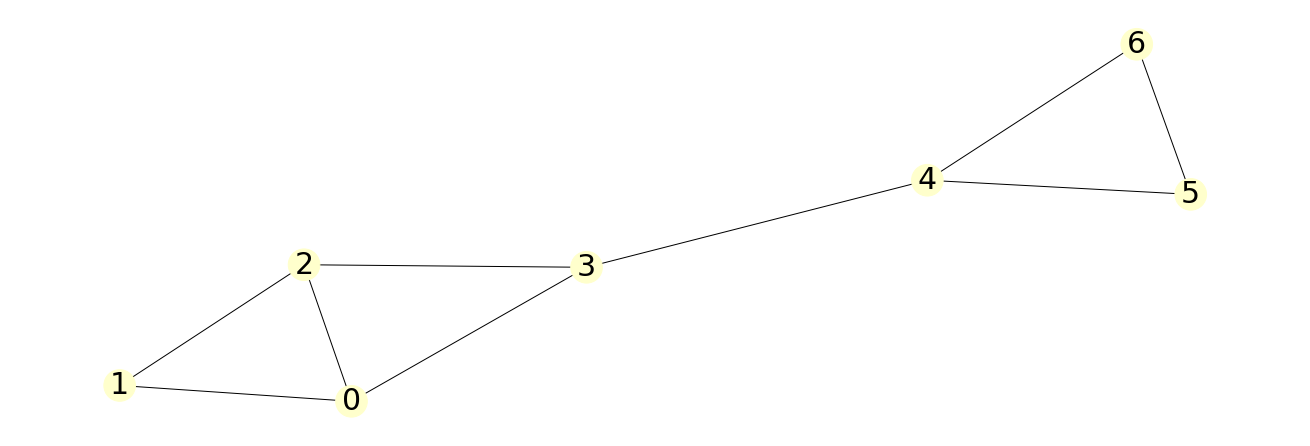

In [9]:
# Leave as-is

g = nx.Graph()

g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 0)
g.add_edge(0, 2)
g.add_edge(3, 4)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 4)

plot_graph(g, height=6, width=18, font_size=30)

A partition of a graph is represented as a list of sets. Each set represents a part of the graph. For instance, the following are two partitions. The first one is arguably the most natural way of dividing this graph: nodes 0, 1, 2, 3 belong to one partition, and nodes 4, 5, and 6 to the other partition. The second one places the node 3 in the "wrong" partition.

NetworkX has a function to compute the modularity of a partition: [community.quality.modularity](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html). It applies the formula we discussed in class:

![Modularity formula](modularity_formula.png)

Where:

* Q is the modularity
* C is a community
* L<sub>C</sub> is the number of internal links in C (internal means connecting two nodes in C)
* K<sub>C</sub> is the summation of the degree of nodes in C
* L is the total number of links in the graph

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

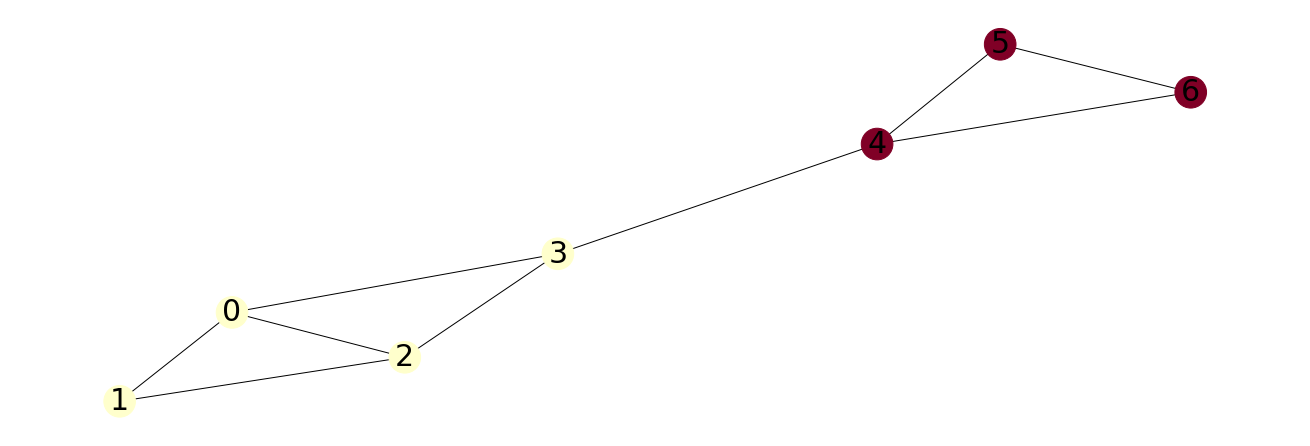

Modularity of partition 1 according to NetworkX: 0.3642


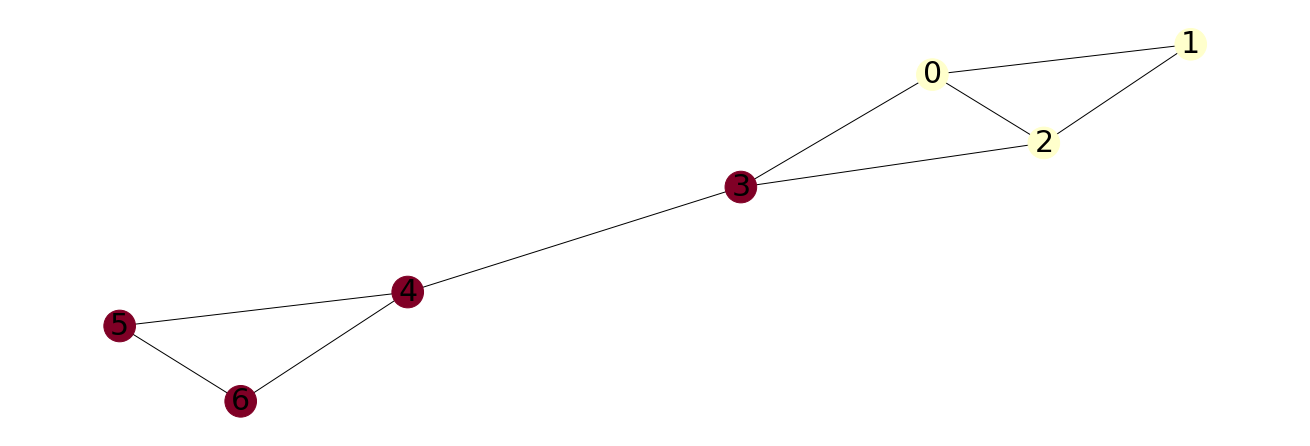

Modularity of partition 2 according to NetworkX: 0.2716


In [10]:
# LEAVE AS-IS

partition1 = [
    {0, 1, 2, 3},
    {4, 5, 6}
]
plot_graph(g, height=6, width=18, font_size=30, partition=partition1)
print("Modularity of partition 1 according to NetworkX: %.4f" % nx.community.quality.modularity(g, partition1))


partition2 = [
    {0, 1, 2},
    {3, 4, 5, 6}
]
plot_graph(g, height=6, width=18, font_size=30, partition=partition2)
print("Modularity of partition 2 according to NetworkX: %.4f" % nx.community.quality.modularity(g, partition2))

Create a function `modularity(g, partition)`. First, define two auxiliary functions:

* `Lc(g, C)`, returning the number of internal links within community C. An easy way of doing this is creating a [subgraph](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) of g restricted to the nodes in C, and then counting the [number of edges](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html) in that subgraph.
* `kc(g, C)`, returning the sumation of the degree of nodes in C in the graph g (do not create a subgraph).

Then, write the function `modularity` using these two auxiliary functions.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `Lc(g, C)`, for `kc(g, C)` and for `modularity(g, partition)`.</font>

In [12]:
# LEAVE AS-IS
# It should return the same numbers as the ones computed by NetworkX

print("Modularity of partition 1: %.4f" % modularity(g, partition1))
print("Modularity of partition 2: %.4f" % modularity(g, partition2))


Modularity of partition 1: 0.3642
Modularity of partition 2: 0.2716


# 4. Girvan-Newman algorithm

The Girvan-Newman algorithm generates a series of partitions of a graph. The first partition is simply the entire graph, and the last partition contains each node in its own partition.

The way in which the algorithm operates is by removing the edge with the largest edge betweenness, and returning a new partition if the number of connected components of the graph increases.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 4.1. Find the edge with the largest betweenness

Now, write a function to find the edge with the largest betweenness in a graph.

First, use function [edge_betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html) to obtain a dictionary in which keys are edges, and values are edge betweenness.

Then, iterate through all the `G.edges()` and find the one with the maximum edge betweenness.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `largest_betweenness_edge`, using the edge_betweenness_centrality function in NetworkX</font>

In [14]:
# LEAVE AS-IS
# The answer should be pretty obvious, considering the graph

print(largest_betweenness_edge(g))

(3, 4)


## 4.2. Iteratively remove the edge with the largest betweenness

We will use the following auxiliary function, that you can leave as-is. The reason we are introducing function `list_connected_components` is convenience, as the function [connected_components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html) in NetworkX returns a [generator](https://wiki.python.org/moin/Generators) instead of a list.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [15]:
# LEAVE AS-IS

def list_connected_components(g):
    return list(nx.connected_components(g))

def number_connected_components(g):
    return len(list_connected_components(g))


Now, implement the `girvan_newman` algorithm using the following template:

```python
def girvan_newman(orig):

    # Copy the original graph
    g = orig.copy()

    # All of the nodes in a single partition is the first partition we create
    partition_sequence = [list_connected_components(g)]
    
    # Compute the current number of connected components (ncomp)
    # TO-DO complete this
    
    # While we have not arrived to a situation where each node is a singleton
    while ncomp < g.number_of_nodes():
        
        # Find an edge to remove and remove it
        # TO-DO complete this
        
        # Recompute the new number of connected components (ncomp_new)
        # TO-DO complete this
        
        # If the number of connected components has increased
        if ncomp_new > ncomp:
            
            # Add to the partition sequence the list of connected components
            # TO-DO complete this
            
            # Update the number of connected components
            ncomp = ncomp_new

    return partition_sequence
```


The output should be partition sequence, i.e., a list of partitions of the graph. In this particular case, the partition sequence looks like this:

```python
[[{0, 1, 2, 3, 4, 5, 6}],
 [{0, 1, 2, 3}, {4, 5, 6}],
 [{0, 2, 3}, {1}, {4, 5, 6}],
 ...
 [{0}, {1}, {2}, {3}, {4}, {5}, {6}]]
```

The way to interpret this is as follows:

* The first partition is simply all nodes in a single part
* The second partition happens after removing edge (3, 4), and divides the graph into two partitions
* The third partition happens after removing edges (0, 1) and (1, 2), ...
* ...
* The last partition happens after removing all edges, and each node is a singleton

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `girvan_newman` following the template above</font>

In [17]:
# LEAVE AS-IS

def run_girvan_newman(g):

    partitions = girvan_newman(g)
    modularity_profile = []    
    for partition in partitions:
        print("Partition %s" % (partition,) )
        m = modularity(g, partition)
        print("Modularity: %.4f" % m)
        modularity_profile.append(m)
        print()  
        
    plt.xlabel("Iteration")
    plt.ylabel("Modularity")
    plt.title("Modularity profile")
    plt.plot(modularity_profile)

Partition [{0, 1, 2, 3, 4, 5, 6}]
Modularity: 0.0000

Partition [{0, 1, 2, 3}, {4, 5, 6}]
Modularity: 0.3642

Partition [{0, 2, 3}, {1}, {4, 5, 6}]
Modularity: 0.2531

Partition [{0}, {1}, {2, 3}, {4, 5, 6}]
Modularity: 0.1420

Partition [{0}, {1}, {2}, {3}, {4, 5, 6}]
Modularity: 0.0864

Partition [{0}, {1}, {2}, {3}, {4}, {5, 6}]
Modularity: -0.0617

Partition [{0}, {1}, {2}, {3}, {4}, {5}, {6}]
Modularity: -0.1481



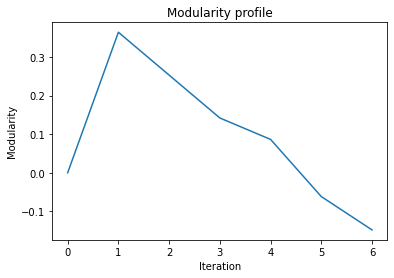

In [18]:
# LEAVE AS-IS

run_girvan_newman(g)

Partition [{'POGGLE', 'CAPTAIN PANAKA', 'JOBAL', 'FINN', 'CLONE COMMANDER CODY', 'RIEEKAN', 'CLIEGG', 'COUNT DOOKU', 'ELLO ASTY', 'LUKE', 'RED LEADER', 'YODA', 'KITSTER', 'OWEN', 'KI-ADI-MUNDI', 'FANG ZAR', 'CAPTAIN TYPHO', 'RIC OLIE', 'REY', 'BOBA FETT', 'JESS', 'VALORUM', 'SIO BIBBLE', 'GREEDO', 'LEIA', 'SUN RIT', 'MAZ', 'SNAP', 'R2-D2', 'RABE', 'SHMI', 'NIV LEK', 'EMPEROR', 'SOLA', 'BOUSHH', 'CAPTAIN PHASMA', 'JABBA', 'QUI-GON', 'POE', 'WEDGE', 'LOR SAN TEKKA', 'YOLO ZIFF', 'BIGGS', 'WATTO', 'NUTE GUNRAY', 'RUWEE', 'BALA-TIK', 'WALD', 'HAN', 'ADMIRAL STATURA', 'ADMIRAL ACKBAR', 'DARTH VADER', 'GOLD LEADER', 'KYLO REN', 'CHEWBACCA', 'PADME', 'MACE WINDU', 'SENATOR ASK AAK', 'BB-8', 'SEBULBA', 'LANDO', 'GIDDEAN DANU', 'BERU', 'BOSS NASS', 'MON MOTHMA', 'C-3PO', 'BAIL ORGANA', 'OBI-WAN', 'JAR JAR'}]
Modularity: 0.0000

Partition [{'POE', 'YOLO ZIFF', 'JESS', 'ELLO ASTY', 'NIV LEK'}, {'POGGLE', 'CAPTAIN PANAKA', 'JOBAL', 'FINN', 'CLONE COMMANDER CODY', 'RIEEKAN', 'CLIEGG', 'COUNT DOOKU'

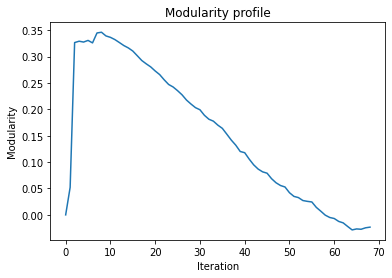

In [19]:
# LEAVE AS-IS

run_girvan_newman(swcore)

<font size="+1" color="red">Replace this cell with a brief commentary about the modularity profiles above, and which would be the partitioning that should be chosen in each case.</font>

Create function `run_girvan_newman_modularity` that runs Girvan-Newman and returns the partition with the largest modularity.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for `run_girvan_newman_modularity`.</font>

The best partition has modularity 0.3462 and 9 communities


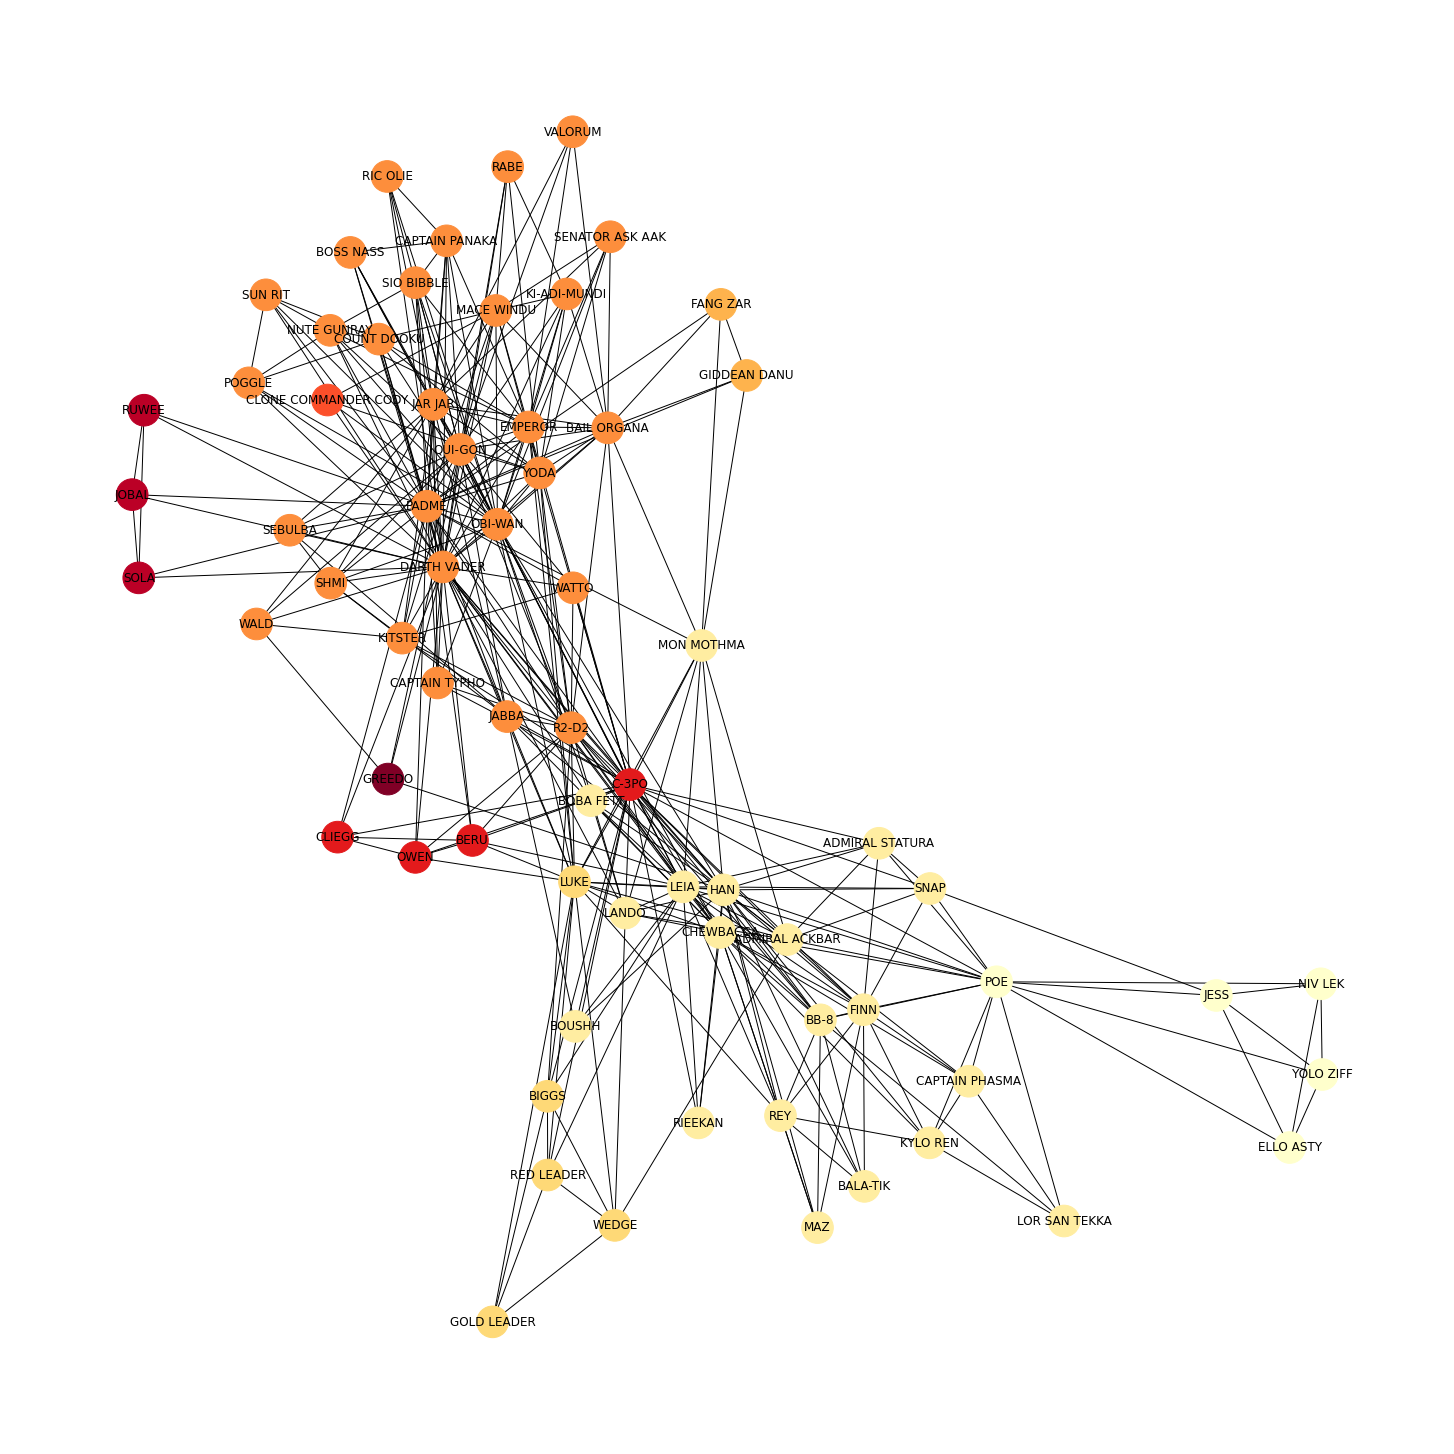

In [21]:
# LEAVE AS-IS

partition = run_girvan_newman_modularity(swcore)
print("The best partition has modularity %.4f and %d communities" % (modularity(swcore, partition), len(partition)))
plot_graph(swcore, partition=partition)

<font size="+1" color="red">Replace this cell with a brief commentary about what you see in this partitioning. If you see some interesting community or communities, you can look online to check if the characters in those communities are somehow related in the series.</font>

# Deliver, your code you must (individually)

A .zip file containing:

* This notebook.


## Available, extra points are

For extra points and extra learning (+2, so your maximum grade can be a 12 in this assignment), implement a label propagation algorithm for finding communities. This algorithm receives as input the desired number of communities and a target number of iterations. It initializes by assigning randomly each node to one of the communities. Then, for the target number of iterations, it moves every node to the community to which the majority of its neighbors belong.

**Note:** if for extra points you go, ``<font size="+2" color="blue">Additional results: additional partitioning algorithm</font>`` at the top of your notebook, you must add.

<font size="-1" color="gray">(This cell, when delivering, remove.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>